In [1]:
# Pandas
from config import DB_USER, DB_PASS, DB_ENDPOINT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SQL Alchemy
from sqlalchemy import create_engine

In [2]:
 # Create Engine
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_ENDPOINT}")
conn = engine.connect()

In [3]:
# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM historical", conn, index_col="index")
data.head()

,crypto,time,open,high,low,close,volume,trade
index,,,,,,,,
0,bitcoin_usdt,1.511914e+09,9896.79000000,11300.03000000,8520.00000000,9687.88000000,13352.53871500,8662.63236200
1,bitcoin_usdt,1.512000e+09,9687.88000000,10900.00000000,8850.80000000,9838.96000000,9389.57432900,5360.66024200
2,bitcoin_usdt,1.512086e+09,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,3269.86858800
3,bitcoin_usdt,1.512173e+09,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,2390.19427500
4,bitcoin_usdt,1.512259e+09,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,2574.24618700


In [4]:
ethereum_df = data[data["crypto"] == "ethereum_usdt"]
ethereum_df = ethereum_df.reset_index(drop=True)
ethereum_df

,crypto,time,open,high,low,close,volume,trade
0,ethereum_usdt,1.511914e+09,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,ethereum_usdt,1.512000e+09,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,ethereum_usdt,1.512086e+09,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,ethereum_usdt,1.512173e+09,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,ethereum_usdt,1.512259e+09,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...,...,...
1457,ethereum_usdt,1.637798e+09,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
1458,ethereum_usdt,1.637885e+09,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
1459,ethereum_usdt,1.637971e+09,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000
1460,ethereum_usdt,1.638058e+09,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000


In [5]:
# drop the crypto column which is just a name
ethereum_df = ethereum_df.drop("crypto", axis=1)
ethereum_df

,time,open,high,low,close,volume,trade
0,1.511914e+09,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,1.512000e+09,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,1.512086e+09,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,1.512173e+09,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,1.512259e+09,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...,...
1457,1.637798e+09,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
1458,1.637885e+09,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
1459,1.637971e+09,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000
1460,1.638058e+09,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000


In [6]:
ethereum_df["time"] = pd.to_datetime(ethereum_df['time'], unit="s")
ethereum_df

,time,open,high,low,close,volume,trade
0,2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...,...
1457,2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
1458,2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
1459,2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000
1460,2021-11-28,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000


In [7]:
# make the predictions 30 days in the future for the target.
projection = 30
ethereum_df["prediction"] = ethereum_df["close"].shift(-projection)
ethereum_df

,time,open,high,low,close,volume,trade,prediction
0,2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000,733.99000000
1,2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000,681.06000000
2,2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000,733.98000000
3,2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000,754.99000000
4,2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000,855.28000000
...,...,...,...,...,...,...,...,...
1457,2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000,NaN
1458,2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000,NaN
1459,2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000,NaN
1460,2021-11-28,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000,NaN


In [8]:
ethereum_df = ethereum_df.set_index("time")
ethereum_df

,open,high,low,close,volume,trade,prediction
time,,,,,,,
2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000,733.99000000
2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000,681.06000000
2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000,733.98000000
2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000,754.99000000
2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000,855.28000000
...,...,...,...,...,...,...,...
2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000,NaN
2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000,NaN
2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000,NaN


In [9]:
#We have to drop nan values
ethereum_df = ethereum_df.dropna()

In [10]:
ethereum_df.dtypes

open          object
high          object
low           object
close         object
volume        object
trade         object
prediction    object
dtype: object

In [11]:
# convert to numerical
ethereum_df = ethereum_df.astype({"open": float, "high": float, "low":float, "close": float, "volume": float, "trade": float, "prediction": float})
ethereum_df.dtypes

open          float64
high          float64
low           float64
close         float64
volume        float64
trade         float64
prediction    float64
dtype: object

In [12]:
# remove the last 14 rows from the data (days we want to predict as future dates)
X = ethereum_df[:-projection]

In [13]:
# Set the features
X = X.drop("prediction", axis=1)
X

,open,high,low,close,volume,trade
time,,,,,,
2017-11-29,466.17,515.00,385.00,421.70,51313.49571,23825.39377
2017-11-30,421.92,460.00,387.01,427.43,45184.22265,24018.42012
2017-12-01,428.05,465.97,413.74,457.51,33072.21995,19043.24922
2017-12-02,457.53,471.91,445.00,457.63,25796.14000,12336.59141
2017-12-03,457.31,485.90,440.11,460.30,24490.05997,12239.10293
...,...,...,...,...,...,...
2021-09-26,2921.84,3115.51,2738.17,3059.37,703594.47800,346152.90530
2021-09-27,3059.36,3164.94,2922.71,2925.59,510130.73190,249913.29030
2021-09-28,2924.76,2970.82,2789.00,2804.91,511325.46430,250476.15270


In [14]:
# remove the last 14 rows from the data (days we want to predict)
y = ethereum_df[:-projection]

In [15]:
# Set the target
y = y["prediction"]
y

time
2017-11-29     733.99
2017-11-30     681.06
2017-12-01     733.98
2017-12-02     754.99
2017-12-03     855.28
               ...   
2021-09-26    4131.52
2021-09-27    3922.00
2021-09-28    4286.02
2021-09-29    4418.89
2021-09-30    4322.68
Name: prediction, Length: 1402, dtype: float64

LR: -1.721614 (1.970621)
Lasso: -0.353506 (0.744661)
Ridge: -0.892755 (1.023370)
RF: -0.719091 (0.727786)
XGBOOST: -0.824312 (0.562262)
NN: 0.354247 (0.110331)
KNN: -6.341482 (5.785624)
SVR: -11.271765 (13.206510)


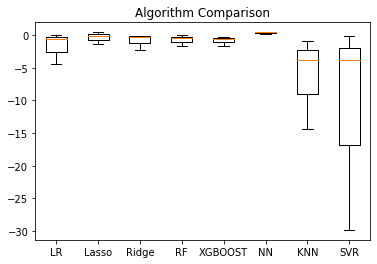

In [16]:
# perform cross validation
import warnings
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score


warnings.simplefilter("ignore")

models = []
models.append(('LR', LinearRegression(normalize=True)))
models.append(('Lasso', Lasso(normalize=True))) 
models.append(('Ridge', Ridge(normalize=True))) 
models.append(('RF', RandomForestRegressor(n_estimators = 200)))
models.append(('XGBOOST', XGBRegressor(n_estimators = 200, verbosity = 0)))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    tscv = TimeSeriesSplit(n_splits=3)
    cv_results = cross_val_score(model, X, y, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

We can see that Linear Regression, Lasso and NN models appear to perform the best. Serdar is already building a NN model, so we will dig further into Lasso.

Are Low R-squared Values Always a Problem?
No! Regression models with low R-squared values can be perfectly good models for several reasons.

Some fields of study have an inherently greater amount of unexplainable variation. In these areas, your R2 values are bound to be lower. For example, studies that try to explain human behavior generally have R2 values less than 50%. People are just harder to predict than things like physical processes.

Fortunately, if you have a low R-squared value but the independent variables are statistically significant, you can still draw important conclusions about the relationships between the variables. Statistically significant coefficients continue to represent the mean change in the dependent variable given a one-unit shift in the independent variable. Clearly, being able to draw conclusions like this is vital.

In [17]:
# We need to set our training and testing data.
# We want all of the data except the last 30 days to train on, and we will test on the last 30 days

#remove the last X (projection) number of days we want to predict for
X_train = ethereum_df[:-projection]
#remove last 30 days we want to keep as test data and drop our label which is the prediction column
X_train = X_train.drop("prediction",axis=1)
print(X_train)


y_train = ethereum_df[:-projection]
y_train = y_train["prediction"]
y_train

               open     high      low    close        volume         trade
time                                                                      
2017-11-29   466.17   515.00   385.00   421.70   51313.49571   23825.39377
2017-11-30   421.92   460.00   387.01   427.43   45184.22265   24018.42012
2017-12-01   428.05   465.97   413.74   457.51   33072.21995   19043.24922
2017-12-02   457.53   471.91   445.00   457.63   25796.14000   12336.59141
2017-12-03   457.31   485.90   440.11   460.30   24490.05997   12239.10293
...             ...      ...      ...      ...           ...           ...
2021-09-26  2921.84  3115.51  2738.17  3059.37  703594.47800  346152.90530
2021-09-27  3059.36  3164.94  2922.71  2925.59  510130.73190  249913.29030
2021-09-28  2924.76  2970.82  2789.00  2804.91  511325.46430  250476.15270
2021-09-29  2805.15  2950.00  2782.00  2850.45  411305.08930  207837.60360
2021-09-30  2850.45  3048.42  2837.19  3000.61  506896.76120  255146.89260

[1402 rows x 6 columns]


time
2017-11-29     733.99
2017-11-30     681.06
2017-12-01     733.98
2017-12-02     754.99
2017-12-03     855.28
               ...   
2021-09-26    4131.52
2021-09-27    3922.00
2021-09-28    4286.02
2021-09-29    4418.89
2021-09-30    4322.68
Name: prediction, Length: 1402, dtype: float64

In [18]:
# Our testing set will be the last 30 days excluding the dates we want to predict for.
X_test = ethereum_df[-projection:]
# Just the last 30 days
X_test = X_test.drop("prediction", axis=1)
print(X_test)

y_test = ethereum_df[-projection:]
y_test = y_test["prediction"]
y_test

               open     high      low    close        volume         trade
time                                                                      
2021-10-01  3000.62  3330.00  2969.07  3309.91  648714.61510  336578.17690
2021-10-02  3309.91  3469.00  3257.00  3387.76  422551.18110  215469.09750
2021-10-03  3387.77  3488.00  3342.51  3417.73  360586.89050  183173.92820
2021-10-04  3417.73  3437.19  3270.00  3386.31  485204.64200  234726.45740
2021-10-05  3386.31  3545.00  3363.78  3515.27  393900.88180  198949.77870
2021-10-06  3515.48  3632.11  3342.00  3574.89  618265.54020  309931.14560
2021-10-07  3574.88  3653.98  3470.80  3587.47  486102.35910  243095.03090
2021-10-08  3587.47  3695.00  3532.00  3563.13  403597.14370  199496.51730
2021-10-09  3563.13  3635.00  3538.07  3574.82  361906.75140  181998.68950
2021-10-10  3574.83  3604.00  3405.00  3414.22  580223.63020  283364.09360
2021-10-11  3414.22  3623.80  3371.00  3542.12  493521.88200  241854.81720
2021-10-12  3542.12  3547

time
2021-10-01    4287.21
2021-10-02    4319.43
2021-10-03    4589.89
2021-10-04    4603.35
2021-10-05    4532.32
2021-10-06    4474.24
2021-10-07    4518.00
2021-10-08    4612.59
2021-10-09    4807.98
2021-10-10    4732.33
2021-10-11    4628.78
2021-10-12    4719.00
2021-10-13    4665.46
2021-10-14    4644.28
2021-10-15    4626.50
2021-10-16    4563.78
2021-10-17    4209.76
2021-10-18    4287.80
2021-10-19    3996.90
2021-10-20    4294.76
2021-10-21    4412.17
2021-10-22    4258.31
2021-10-23    4085.97
2021-10-24    4339.44
2021-10-25    4269.36
2021-10-26    4524.85
2021-10-27    4041.20
2021-10-28    4095.29
2021-10-29    4294.78
2021-10-30    4444.53
Name: prediction, dtype: float64

In [19]:
model = Lasso(normalize=True)

model.fit(X_train, y_train)
print(model.score(X_test,y_test))

-8.647400775261643


In [20]:
predictions = model.predict(X_test)
data = pd.DataFrame()
data["actual"] = y_test
data["predictions"] = predictions
data["difference ($)"] = data["predictions"] - data["actual"]
data["difference (%)"] = data["difference ($)"] / data["actual"] *100
data

,actual,predictions,difference ($),difference (%)
time,,,,
2021-10-01,4287.21,3213.137042,-1074.072958,-25.052959
2021-10-02,4319.43,3514.442369,-804.987631,-18.636432
2021-10-03,4589.89,3604.044476,-985.845524,-21.478631
2021-10-04,4603.35,3528.853451,-1074.496549,-23.341622
2021-10-05,4532.32,3627.109630,-905.210370,-19.972340
2021-10-06,4474.24,3607.641907,-866.598093,-19.368610
2021-10-07,4518.00,3742.011796,-775.988204,-17.175480
2021-10-08,4612.59,3805.471797,-807.118203,-17.498156
2021-10-09,4807.98,3811.335884,-996.644116,-20.728957


In [21]:
print(data["difference (%)"].mean())

-10.51935905806133


<AxesSubplot:xlabel='time'>

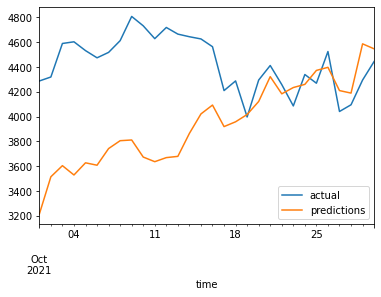

In [22]:
#plot chart
data.plot(y=["actual", "predictions"])

In [23]:
data = pd.DataFrame()
data["scores"] = model.coef_
data["features"] = ethereum_df.drop("prediction",axis=1).columns.tolist()
data

,scores,features
0,0.000000,open
1,0.000000,high
2,1.060185,low
3,0.000000,close
4,0.000000,volume
5,0.000033,trade


<AxesSubplot:xlabel='features'>

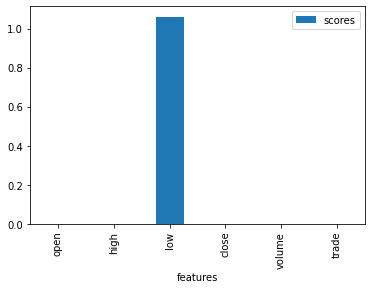

In [24]:
data.plot(kind="bar", x="features", y="scores")

it seems the low and the close are the most relevant features

In [25]:
model = LinearRegression(normalize=True)

model.fit(X_train, y_train)
print(model.score(X_test,y_test))

-6.209596205147941


In [26]:
predictions = model.predict(X_test)
data = pd.DataFrame()
data["actual"] = y_test
data["predictions"] = predictions
data["difference ($)"] = data["predictions"] - data["actual"]
data["difference (%)"] = data["difference ($)"] / data["actual"] *100
data

,actual,predictions,difference ($),difference (%)
time,,,,
2021-10-01,4287.21,3259.799774,-1027.410226,-23.964542
2021-10-02,4319.43,3605.558970,-713.871030,-16.526973
2021-10-03,4589.89,3740.276596,-849.613404,-18.510540
2021-10-04,4603.35,3750.919854,-852.430146,-18.517604
2021-10-05,4532.32,3771.263273,-761.056727,-16.791769
2021-10-06,4474.24,3791.624907,-682.615093,-15.256560
2021-10-07,4518.00,3926.076810,-591.923190,-13.101443
2021-10-08,4612.59,3897.972676,-714.617324,-15.492756
2021-10-09,4807.98,3987.593835,-820.386165,-17.063011


In [27]:
print(data["difference (%)"].mean())

-7.300784068659792


<AxesSubplot:xlabel='time'>

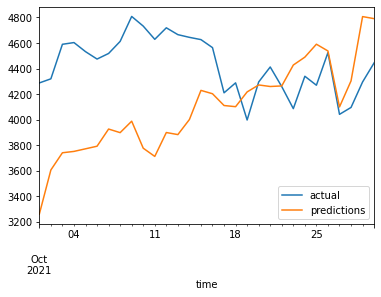

In [28]:
#plot chart
data.plot(y=["actual", "predictions"])

In [29]:
data = pd.DataFrame()
data["scores"] = model.coef_
data["features"] = ethereum_df.drop("prediction",axis=1).columns.tolist()
data

,scores,features
0,0.738969,open
1,-1.564145,high
2,0.979146,low
3,0.995142,close
4,0.000026,volume
5,0.000155,trade


<AxesSubplot:xlabel='features'>

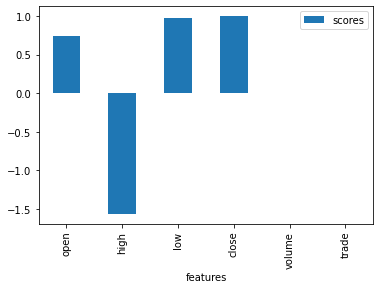

In [30]:
data.plot(kind="bar", x="features", y="scores")